# Sección 4.8 Problema 13

This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis as LDA,
    QuadraticDiscriminantAnalysis as QDA,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    roc_curve,
)

In [39]:
Weekly = load_data("Weekly")
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [40]:
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?


In [41]:
Weekly.drop("Direction", axis=1).corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Las correlaciones entre las variables de lag y con Today son cercanas a cero. La única correlación relevante es la de Year y Volume.


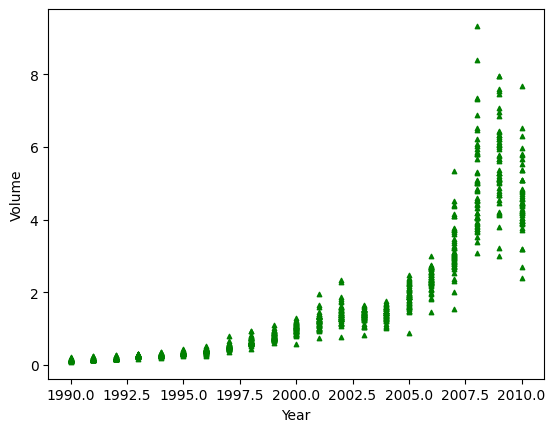

In [42]:
plt.scatter(Weekly.Year, Weekly.Volume, c="green", s=10, marker="^")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

Al graficar los datos vemos que el volumen aumenta con el tiempo


(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?


In [43]:
df = pd.get_dummies(Weekly, columns=["Direction"], drop_first=True)
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [44]:
# Datos
X = df[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]]
y = df[["Direction_Up"]]

In [45]:
X = sm.add_constant(X)
model1 = sm.Logit(y, X)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 1.925080
         Iterations 4


In [46]:
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                     inf
Time:                        19:11:08   Log-Likelihood:                -2096.4
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.0

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.llf/self.llnull


Los p_values son muy grandes por lo que no hay evidencia clara de una asociación de los Lag y Volume con respecto a la Dirección. Con excepción de Lag2 que tiene un p-value de 0.03


(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.


In [47]:
# Dividimos los datos en conjunto de entrenamiento y pruebas
# 40% son utilizados para las pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.4, random_state=42
)

In [48]:
# Escalar el conjunto de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Guardado de los nombres de las variables
var_names = X.columns

In [49]:
# Modelo de regresión logistica
model_rl = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_rl.predict(X_test)
y_pred_score = model_rl.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy del modelo: 0.555045871559633


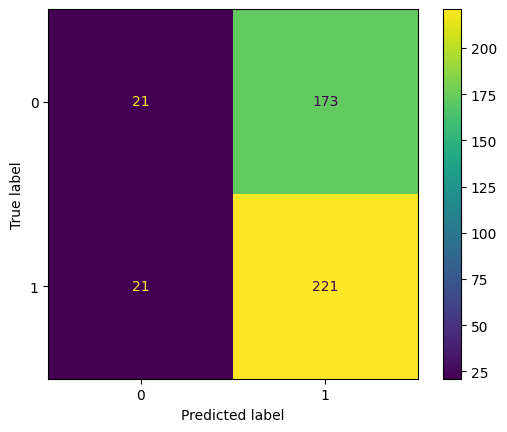

In [50]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rl.classes_)
disp.plot()
plt.show()

In [51]:
print("\nInforme de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"auc: {roc_auc}")


Informe de clasificación:
Precision: 0.5609137055837563
Recall: 0.9132231404958677
auc: 0.5485643690892051


In [52]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)

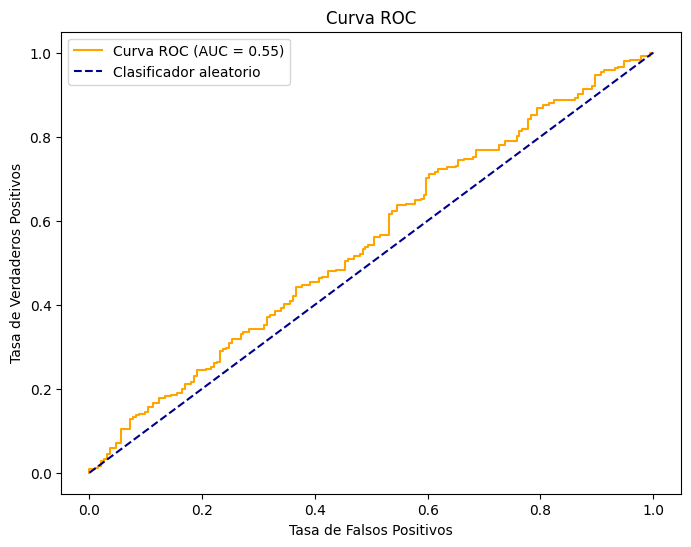

In [53]:
# Graficar la curva ROC
plt.figure("ROC Regresion Logistica", figsize=(8, 6))
plt.plot(fpr, tpr, color="orange", label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot(
    [0, 1], [0, 1], color="darkblue", linestyle="--", label="Clasificador aleatorio"
)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).


In [54]:
df1 = df[["Year", "Lag2", "Direction_Up"]]
df1

train = df1.Year < 2009
X_train = df1.loc[train]
X_test = df1.loc[~train]
y_train = df1.loc[train]
y_test = df1.loc[~train]

In [55]:
X_train = X_train[["Lag2"]]
X_test = X_test[["Lag2"]]
y_train = y_train[["Direction_Up"]]
y_test = y_test[["Direction_Up"]]

In [56]:
# Guardado de los nombres de las variables
var_names = X.columns

In [57]:
# Ajustar el modelo con los datos de entrenamiento
model_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_rl.predict(X_test)
y_pred_score = model_rl.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy del modelo: 0.625


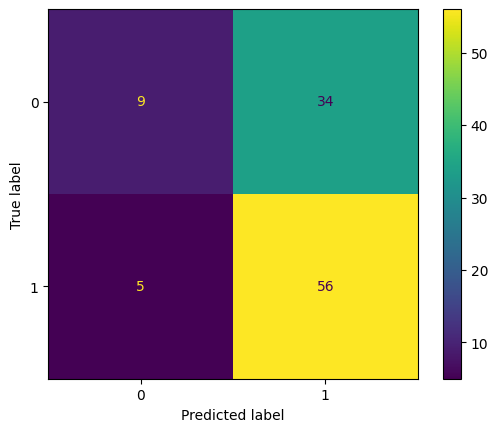

In [58]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rl.classes_)
disp.plot()
plt.show()

In [59]:
print("\nInforme de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"auc: {roc_auc}")


Informe de clasificación:
Precision: 0.6222222222222222
Recall: 0.9180327868852459
auc: 0.5463210064811285


In [60]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)

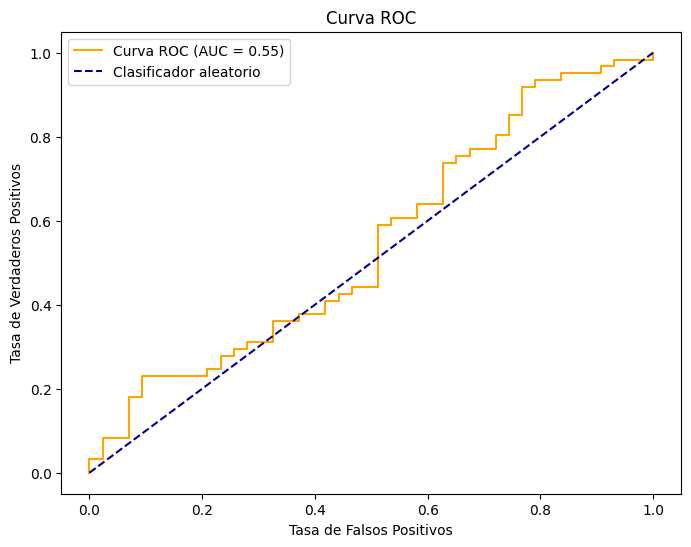

In [61]:
# Graficar la curva ROC
plt.figure("ROC Regresion Logistica", figsize=(8, 6))
plt.plot(fpr, tpr, color="orange", label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot(
    [0, 1], [0, 1], color="darkblue", linestyle="--", label="Clasificador aleatorio"
)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

(e) Repeat (d) using LDA


In [62]:
# Create an LDA classifier
lda = LDA()

# Fit the classifier to the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)
y_pred_score = lda.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión del modelo: 0.625


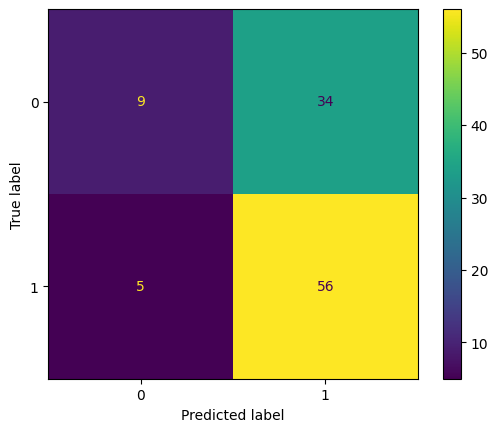

In [63]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred, labels=lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot()
plt.show()

In [64]:
print("Informe de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")


Informe de clasificación:
Precision: 0.6222222222222222
Recall: 0.9180327868852459
ROC-AUC: 0.5463210064811285


(f) Repeat (d) using QDA.


In [65]:
qda = QDA()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
y_pred_score = qda.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión del modelo: 0.5865384615384616


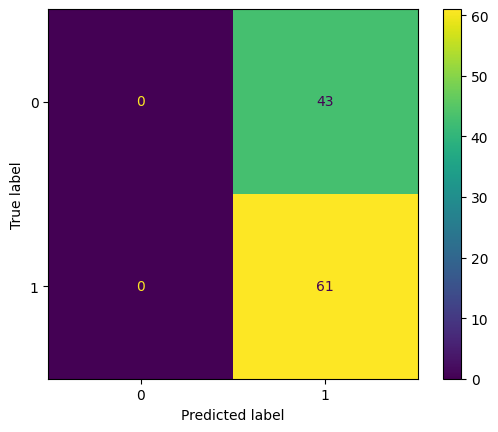

In [66]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred, labels=qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=qda.classes_)
disp.plot()
plt.show()

In [67]:
print("Informe de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")


Informe de clasificación:
Precision: 0.5865384615384616
Recall: 1.0
ROC-AUC: 0.508577964163172


(g) Repeat (d) using KNN with K = 1.


In [68]:
# Create a KNN classifier with a specified number of neighbors (e.g., 3)
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)
y_pred_score = knn.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Precisión del modelo: 0.49038461538461536


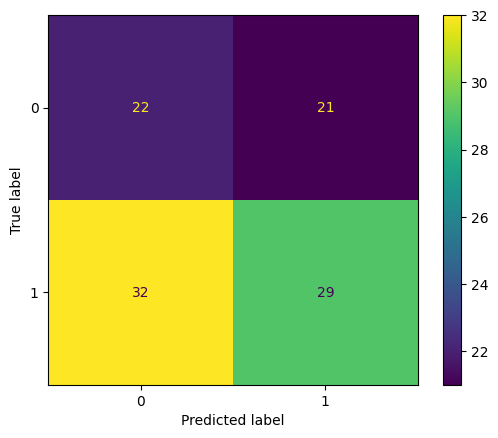

In [69]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [70]:
print("Informe de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")


Informe de clasificación:
Precision: 0.58
Recall: 0.47540983606557374
ROC-AUC: 0.493518871521159


(h) Repeat (d) using naive Bayes.


In [71]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)
y_pred_score = knn.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión del modelo: 0.5865384615384616
Matriz de confusión:


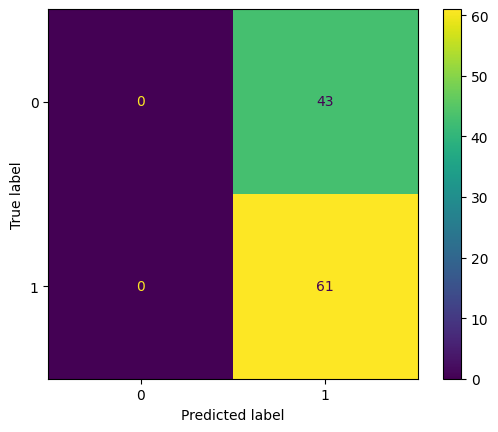

In [72]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
# Mostrar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=nb_classifier.classes_
)
disp.plot()
plt.show()

In [81]:
print("Informe de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")

Informe de clasificación:
Precision: 0.6575342465753424
Recall: 0.3157894736842105
ROC-AUC: 0.5561113527620706


(i) Which of these methods appears to provide the best results on this data?


(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.


## Regresión lineal logistica con las variables: Year, Lag2 y Volume


In [74]:
df = pd.get_dummies(Weekly, columns=["Direction"], drop_first=True)
X = df.drop(columns="Direction_Up")
X = X[["Year", "Lag2", "Volume"]]
y = df[["Direction_Up"]]
y.Direction_Up = (y.Direction_Up).astype(int)
# 0=Down, 1=Up
X = sm.add_constant(X)
model1 = sm.Logit(y, X)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.684070
         Iterations 5


/tmp/ipykernel_258640/2780142896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Direction_Up = (y.Direction_Up).astype(int)


In [75]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                0.004210
Time:                        19:11:10   Log-Likelihood:                -744.95
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.09796
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.1144     37.678      0.613      0.540     -50.732      96.961
Year          -0.0115      0.019     -0.607      0.544      -0.048       0.026
Lag2           0.0631      0.027      2.376      0.017       0.011       0.115
Volume         0.0208      0.068      0.307      0.759      -0.112       0.154
==============================================================================
"""

Accyracy del modelo: 0.5604395604395604


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


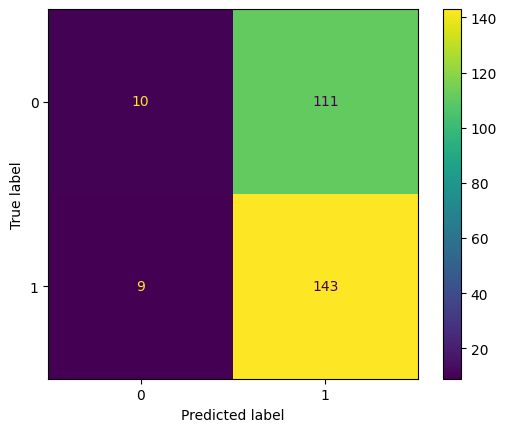


Informe de clasificación:
Precision: 0.562992125984252
Recall: 0.9407894736842105
auc: 0.5570900391474554


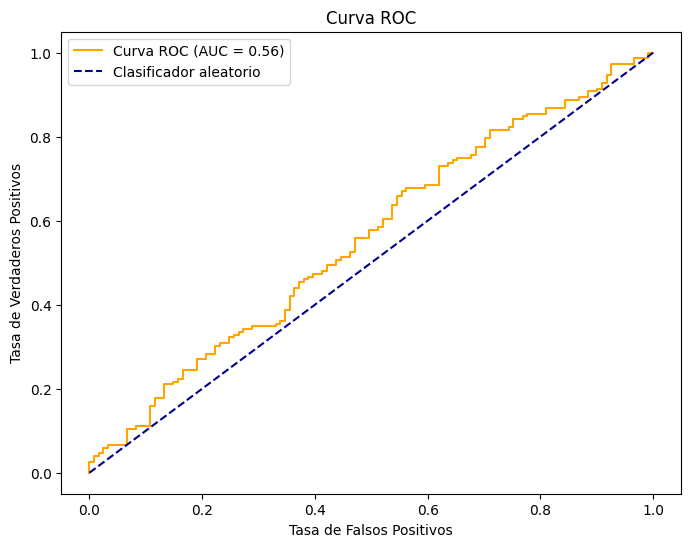

In [76]:
# Dividimos los datos en conjunto de entrenamiento y pruebas
# 25% son utilizados para las pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)
# Escalar el conjunto de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Guardado de los nombres de las variables
var_names = X.columns
# Modelo de regresión logistica
model_rl = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_rl.predict(X_test)
y_pred_score = model_rl.predict_proba(X_test)[:, 1]
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rl.classes_)
disp.plot()
plt.show()
print("\nInforme de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"auc: {roc_auc}")
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
# Graficar la curva ROC
plt.figure("ROC Regresion Logistica", figsize=(8, 6))
plt.plot(fpr, tpr, color="orange", label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot(
    [0, 1], [0, 1], color="darkblue", linestyle="--", label="Clasificador aleatorio"
)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## Regresión lineal logística con las variables Lag1, Lag2 y Lag4


In [77]:
df = pd.get_dummies(Weekly, columns=["Direction"], drop_first=True)
X = df.drop(columns="Direction_Up")
X = X[["Lag1", "Lag2", "Lag4"]]
y = df[["Direction_Up"]]
y.Direction_Up = (y.Direction_Up).astype(int)
# 0=Down, 1=Up
X = sm.add_constant(X)
model1 = sm.Logit(y, X)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.682895
         Iterations 4


/tmp/ipykernel_258640/510593239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Direction_Up = (y.Direction_Up).astype(int)


In [78]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                0.005920
Time:                        19:11:11   Log-Likelihood:                -743.67
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.03126
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2252      0.062      3.653      0.000       0.104       0.346
Lag1          -0.0404      0.026     -1.538      0.124      -0.092       0.011
Lag2           0.0617      0.027      2.318      0.020       0.010       0.114
Lag4          -0.0245      0.026     -0.935      0.350      -0.076       0.027
==============================================================================
"""

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accyracy del modelo: 0.5567765567765568


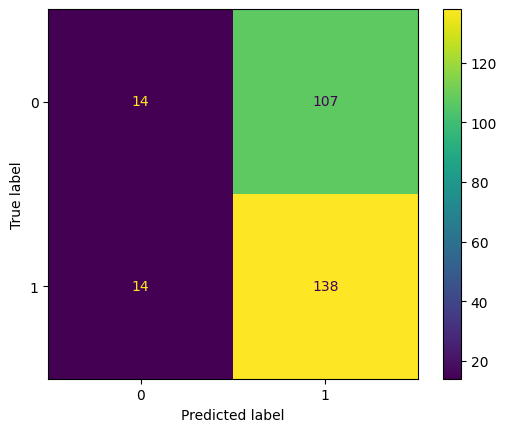


Informe de clasificación:
Precision: 0.563265306122449
Recall: 0.9078947368421053
auc: 0.54458460200087


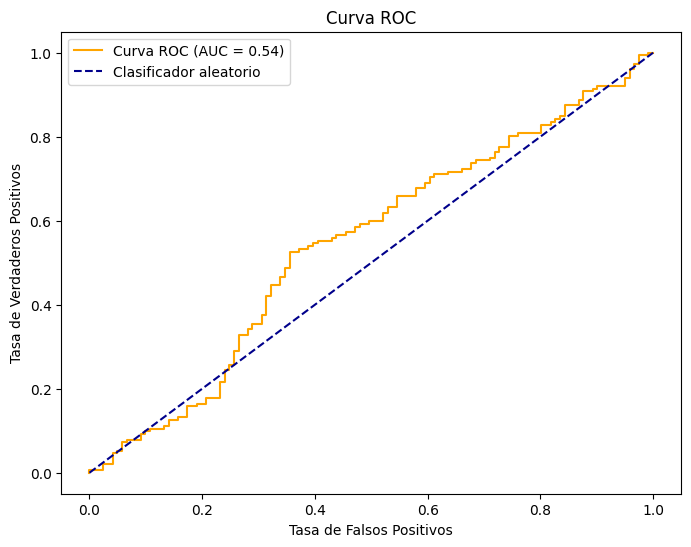

In [79]:
# Dividimos los datos en conjunto de entrenamiento y pruebas
# 25% son utilizados para las pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)
# Escalar el conjunto de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Guardado de los nombres de las variables
var_names = X.columns
# Modelo de regresión logistica
model_rl = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_rl.predict(X_test)
y_pred_score = model_rl.predict_proba(X_test)[:, 1]
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accyracy del modelo: {accuracy}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rl.classes_)
disp.plot()
plt.show()
print("\nInforme de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"auc: {roc_auc}")
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
# Graficar la curva ROC
plt.figure("ROC Regresion Logistica", figsize=(8, 6))
plt.plot(fpr, tpr, color="orange", label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot(
    [0, 1], [0, 1], color="darkblue", linestyle="--", label="Clasificador aleatorio"
)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## KNN, con K = 2


Precisión del modelo: 0.5274725274725275


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


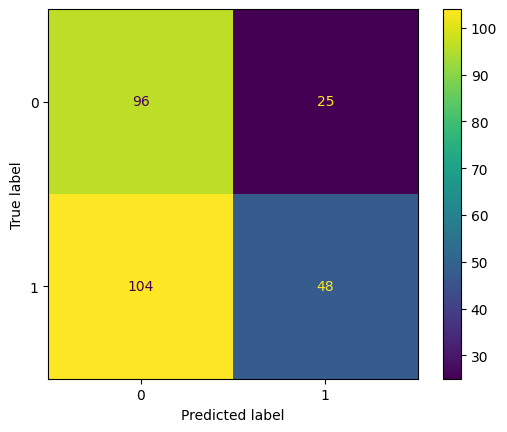


Informe de clasificación:
Precision: 0.6575342465753424
Recall: 0.3157894736842105
ROC-AUC: 0.5561113527620706


In [80]:
# Create a KNN classifier with a specified number of neighbors (e.g., 3)
k = 2
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)
y_pred_score = knn.predict_proba(X_test)[:, 1]
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()
print("\nInforme de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")